In [1]:
import torch
import pandas as pd
import numpy as np
import math
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("C:\\Users\\Mihailo\\Desktop\\datasets\\BelgradeAirport_2021-2012.csv",  low_memory=False)
size, numAttributes = data1.shape
size, numAttributes

(78466, 29)

In [3]:
data1.head()

,DateTime,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E.,sss
0,2021-03-31 23:00,11.9,1010.5,1022.5,-0.5,67,Wind blowing from the north-northwest,1.0,NaN,NaN,...,NaN,NaN,10.0,5.8,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-31 22:00,12.9,1010.9,1022.7,NaN,62,Wind blowing from the north-northwest,1.0,NaN,NaN,...,NaN,NaN,10.0,5.8,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-31 21:00,14.3,1011.0,1022.9,NaN,57,Wind blowing from the north-northwest,1.0,NaN,NaN,...,NaN,NaN,10.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-31 20:00,15.3,1011.0,1022.9,-1.1,53,Wind blowing from the north-northwest,1.0,NaN,NaN,...,NaN,NaN,10.0,5.6,Trace of precipitation,12.0,NaN,NaN,NaN,NaN
4,2021-03-31 19:00,17.5,1011.1,1022.7,NaN,45,Wind blowing from the north-northeast,3.0,NaN,NaN,...,NaN,NaN,20.0,5.5,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data1.isna().sum()

DateTime        0
T               8
Po              6
P               6
Pa          23095
U               6
DD              1
Ff          36774
ff10        71281
ff3         78131
N               5
WW              1
W1          33082
W2          69936
Tn          76255
Tx          76249
Cl          46627
Nh          46622
H           53192
Cm          48357
Ch          51123
VV          41399
Td          36860
RRR         74517
tR          74517
E           76372
Tg          76394
E.          78350
sss         78351
dtype: int64

In [5]:
for i in range(size):
    if np.isnan(data1['sss'][i]):
        data1['sss'][i] = 0

<ipython-input-5-49a00393115f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['sss'][i] = 0


In [21]:
dataCorr = data1.corr(method='pearson')
dataCorr

,T,Po,P,Pa,Ff,Tn,Tx,Td,tR,Tg,sss
T,1.000000,0.037419,0.024390,-0.163958,-0.005832,0.976397,0.978968,0.846163,-0.052039,0.919505,-0.046688
Po,0.037419,1.000000,0.999876,0.034671,-0.078661,0.043151,0.061839,0.059999,0.011204,-0.004077,-0.017871
P,0.024390,0.999876,1.000000,0.048402,-0.078484,0.032670,0.050919,0.051308,0.011593,-0.015091,-0.017467
Pa,-0.163958,0.034671,0.048402,1.000000,0.338849,0.202999,-0.121329,0.038238,0.352947,0.210397,-0.041050
Ff,-0.005832,-0.078661,-0.078484,0.338849,1.000000,0.046306,-0.088651,-0.096342,-0.058402,0.118006,-0.006179
Tn,0.976397,0.043151,0.032670,0.202999,0.046306,1.000000,NaN,0.954888,-0.026784,0.963196,-0.242413
Tx,0.978968,0.061839,0.050919,-0.121329,-0.088651,NaN,1.000000,0.846785,-0.020119,NaN,-0.095558
Td,0.846163,0.059999,0.051308,0.038238,-0.096342,0.954888,0.846785,1.000000,0.009425,0.928750,-0.057059
tR,-0.052039,0.011204,0.011593,0.352947,-0.058402,-0.026784,-0.020119,0.009425,1.000000,-0.026557,0.087264
Tg,0.919505,-0.004077,-0.015091,0.210397,0.118006,0.963196,NaN,0.928750,-0.026557,1.000000,-0.032762


<AxesSubplot:>

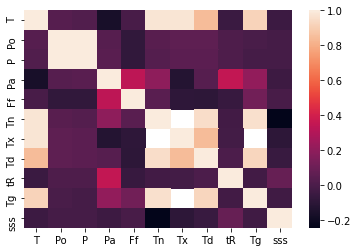

In [22]:
sb.heatmap(dataCorr)

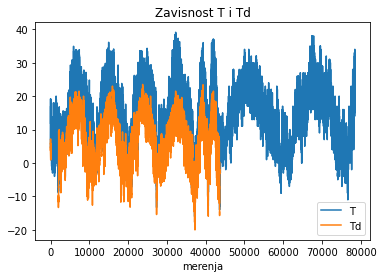

In [23]:
x = data1['T']
y = data1['Td']
plt.plot( x)
plt.plot( y)
plt.xlabel('merenja')
plt.legend(['T', 'Td'])
plt.title('Zavisnost T i Td')
plt.savefig('TTd.png')

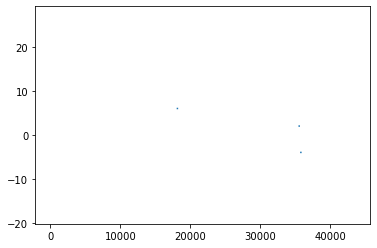

In [75]:
x = data1['Po']
#y = data1['Pa']
z = data1['Tg']
#plt.plot(x)
#plt.plot(y)
plt.plot(z)

In [73]:
print(data1['Tg'].unique())

[ nan   0. -12.  -7.   4.   1.   7.   2.   3.  -4.   8. -14.  -6.  -1.
   5.  -3.   6. -10.  -9.  -2.  -5.  12.  11.  13.   9.  18.  16.  14.
  15.  17.  10.  19.  21.  26.  27.  -8. -11.  20.  22. -13. -18. -16.
 -15.]


In [49]:
x = data1['ff10']
#plt.plot(x)
for x1 in x:
    if str(x1) == x1:
        print(x1)

Light rain
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Light rain
Light rain
Light rain
Light rain
Light rain
Light rain
Light rain, snow
Light rain
Light rain
Light rain
Light rain
Light rain
Light rain
Light rain, snow
Light rain, snow
Light rain, snow
Light rain, snow
Light rain, snow
Light rain, snow
Rain, snow
Rain, snow
Light rain, snow
Light rain, snow
Light rain, snow
Mist
Mist
Mist
Light rain, snow
Light rain, snow
Light rain, snow
Mist
Light rain, snow
Light rain, snow
Light snow
Light snow
Light snow, mist
Light snow, mist
Light snow, mist
Mist
Light snow, mist
Light snow, mist
Light snow
Snow
Snow
Snow
Snow
Light snow
Mist
Ground fog, mist
Fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) 

Mist
Mist
Mist
Mist
Ground fog, mist
Ground fog, mist
Ground fog, mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist,patches fog
Mist
Fog
Fog
Fog
Fog
Fog
Fog
Fog
Fog
Fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Fog
Fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Freezing (supercooled) fog
Fog
Patches fog, mist
Fog
Fog
Fog
Fog
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Fog
Fog
Ground fog, mist
Ground fog, mist
Patches fog
Mist
Ground fog, mist
Ground fog, mist
Ground fog, mist
Ground fog, mist
Ground fog, mist
Mist
Light rain
Light rain
Light rai

Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Light rain
Light rain
Light rain, mist
Light rain, mist
Light rain
Light rain
Light rain
Light rain
Light rain
Light rain
Light rain
Light rain
Light rain
Light rain
Light rain
Ground fog
Ground fog
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Fog
Mist
Fog
Fog
Fog
Fog
Fog
Mist
Mist
Mist
Mist
Mist
Fog
Fog
Fog
Fog
Fog
Fog
Freezing (supercooled) fog
Fog
Fog
Fog
Fog
Fog
Mist
Fog
Fog
Fog
Mist,ground fog
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Light rain
Light rain
Light rain
Light rain, mist
Light rain, mist
Light rain, mist
Light rain, mist
Light rain, mist
Light drizzle, mist
Light drizzle, mist
Light drizzle, mist
Light drizzle, mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Mist
Fog
Mist
Freezing (supercooled) fog
Ground fog, mist
Fog
Ground fog, mist
Mist
Mist
Ground fog, mist
Ground fog
Light rain
Light rain
L